In [42]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
modified_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Survived']]

In [50]:
modified_df.info

<bound method DataFrame.info of      Pclass     Sex   Age  SibSp Embarked  Survived
0         3    male  22.0      1        S         0
1         1  female  38.0      1        C         1
2         3  female  26.0      0        S         1
3         1  female  35.0      1        S         1
4         3    male  35.0      0        S         0
..      ...     ...   ...    ...      ...       ...
886       2    male  27.0      0        S         0
887       1  female  19.0      0        S         1
888       3  female   NaN      1        S         0
889       1    male  26.0      0        C         1
890       3    male  32.0      0        Q         0

[891 rows x 6 columns]>

In [51]:
temp_df = modified_df.dropna()

In [52]:
age_bracket = []
sex = []
embarked = []

for i in temp_df['Age']:
    if i <= 16:
        age_bracket.append(0)
    elif i <= 25:
        age_bracket.append(1)
    elif i <= 34:
        age_bracket.append(2)
    elif i <= 44:
        age_bracket.append(3)
    elif i <= 54:
        age_bracket.append(4)
    elif i < 64:
        age_bracket.append(5)
    else:
        age_bracket.append(6)
        
for i in temp_df['Sex']:
    if i == 'male':
        sex.append(0)
    else:
        sex.append(1)
        
for i in temp_df['Embarked']:
    if i == 'S':
        embarked.append(0)
    elif i == 'C':
        embarked.append(1)
    else:
        embarked.append(2)
        

In [53]:
final_df = temp_df[['Pclass', 'SibSp', 'Survived']]
final_df['Age'] = age_bracket
final_df['Sex'] = sex
final_df['Embarked'] = embarked

X = final_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']]
y = final_df['Survived']

final_df.reset_index()

/var/folders/8n/179l14816838qh7s_0nksl280000gn/T/ipykernel_70410/259767670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Age'] = age_bracket
/var/folders/8n/179l14816838qh7s_0nksl280000gn/T/ipykernel_70410/259767670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sex'] = sex


,index,Pclass,SibSp,Survived,Age,Sex,Embarked
0,0,3,1,0,1,0,0
1,1,1,1,1,3,1,1
2,2,3,0,1,2,1,0
3,3,1,1,1,3,1,0
4,4,3,0,0,3,0,0
...,...,...,...,...,...,...,...
707,885,3,0,0,3,1,2
708,886,2,0,0,2,0,0
709,887,1,0,1,1,1,0
710,889,1,0,1,2,0,1


In [54]:
# part a

[Text(0.5486519607843138, 0.9583333333333334, 'x[1] <= 0.5\ngini = 0.482\nsamples = 712\nvalue = [424, 288]'),
 Text(0.2727941176470588, 0.875, 'x[0] <= 1.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.11764705882352941, 0.7916666666666666, 'x[2] <= 3.5\ngini = 0.478\nsamples = 101\nvalue = [61, 40]'),
 Text(0.052941176470588235, 0.7083333333333334, 'x[2] <= 0.5\ngini = 0.5\nsamples = 55\nvalue = [27, 28]'),
 Text(0.045098039215686274, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.060784313725490195, 0.625, 'x[3] <= 1.5\ngini = 0.499\nsamples = 52\nvalue = [27, 25]'),
 Text(0.052941176470588235, 0.5416666666666666, 'x[2] <= 1.5\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.01568627450980392, 0.4583333333333333, 'x[4] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.00784313725490196, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.023529411764705882, 0.375, 'x[3] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.015686

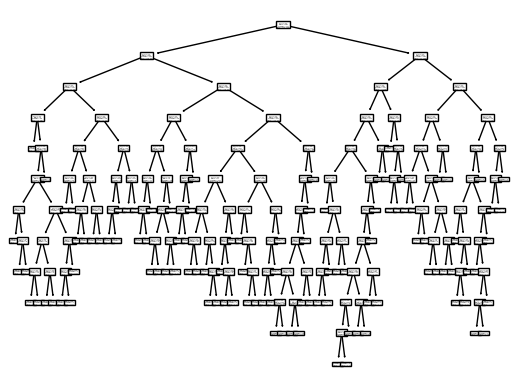

In [55]:
# decisionTreeModel = tree.DecisionTreeClassifier.fit(X, y)
# tree.plot_tree(decisionTreeModel)

decisionTreeModel = tree.DecisionTreeClassifier()
decisionTreeModel = decisionTreeModel.fit(X, y)

tree.plot_tree(decisionTreeModel)

In [56]:
# part b

In [57]:
decisionTree_fold = tree.DecisionTreeClassifier()

tree_score = cross_val_score(decisionTree_fold, X, y, cv = 5, scoring='accuracy')

tree_score.mean()

0.7710627400768246

In [58]:
# part c

In [59]:
forest_model = ensemble.RandomForestClassifier()

forest_score = cross_val_score(forest_model, X, y, cv = 5, scoring='accuracy')

forest_score.mean()

0.7809021963951541